Please specify filename and grid size

In [ ]:
!wget https://raw.githubusercontent.com/millennial-geoscience/Common_Ss_geodata_examples/main/pnbsct_hz_by_il_xl.dat
filename = r'pnbsct_hz_by_il_xl.dat' # filename specified here ('your/filename'). The prefix "r" is there incase you have a linux file path ('\' vs '/')
cs = 1 # cellsize

In [7]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [142]:
h = np.genfromtxt(filename, delimiter= '')
hx, hy, hz, = h[:,1], h[:,0], h[:,2]*-1 #first and second columns are x and y, third column is z (negative down)
hxmin, hxmax = np.min(hx), np.max(hx)
hymin, hymax = np.min(hy), np.max(hy)
hzmin, hzmax = np.min(hz), np.max(hz)
xi, yi = np.arange(hxmin,hxmax+1,cs), np.arange(hymin,hymax+1,cs)
zi = griddata((hx, hy), hz, (xi[None,:], yi[:,None]), method='cubic') # grid the data.
print('hxmin = ', hxmin, '| hxmax =', hxmax, '\nhymin = ', hymin, '| hymax =', hymax) # only to display the coordinate ranges

hxmin =  700.0 | hxmax = 1200.0 
hymin =  200.0 | hymax = 650.0


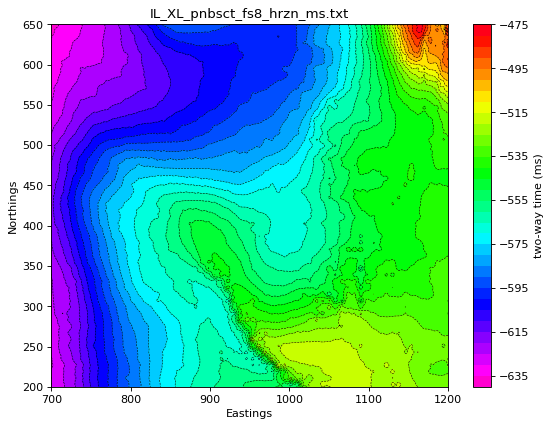

In [140]:
plt.figure(figsize=(a,b), dpi=80)
wide = 8
long = a/1.333
dci = 5
ci = (hzmax - hzmin) / dci
conts = plt.contour(xi,yi,zi,round(ci),linewidths=0.5,colors='k') # create contours
contfill = plt.contourf(xi,yi,zi,round(ci),cmap='gist_rainbow_r') # colourfill contours
#plt.scatter(w1_XL,w1_IL, marker='*', c='b', s=80) # display wells
plt.title(filename) # plot title
plt.xlabel('Eastings')
plt.ylabel('Northings')
plt.colorbar(contfill).set_label('two-way time (ms)')
plt.show()